In [75]:
# Implementation of the Encoding Numerical Feature - Discritization or Binning
# In the first step: without encoding numerical transformation and in the 2nd step with encoding technique
# Author: Muhammad Humayun Khan

import pandas as pd         # data read and processing
import numpy as np          # Linear algebra

import matplotlib.pyplot as plt       # data plotting

from sklearn.model_selection import train_test_split        # for training and testing of model

from sklearn.tree import DecisionTreeClassifier             # decision tree algorithm

from sklearn.metrics import accuracy_score                  # measurement of the accuracy
from sklearn.model_selection import cross_val_score         # cross check with many times of the mean

from sklearn.preprocessing import KBinsDiscretizer          # using encoding binning technique
from sklearn.compose import ColumnTransformer               # column transfer for feature transformation

In [76]:
dataset = '/content/drive/MyDrive/datasets/train.csv'
df = pd.read_csv(dataset,usecols=['Age','Fare','Survived'])

In [77]:
df.dropna(inplace=True)

In [78]:
df.shape

(714, 3)

In [79]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [80]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [83]:
# till here without using encoding technqie
clf = DecisionTreeClassifier()

In [84]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)
# following accuracy is without using encoding numerical feature

0.6503496503496503

In [86]:
# cross check
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6373043818466353

In [87]:
# 2nd step: using binning with 15 bins for both age and fare
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')     # using quantile at present
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [88]:
# two column transformer as first and second with respective indexes
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

# will get the transforms values
print(trf.named_transformers_['first'].n_bins)    # will print number of bins created which is 15
trf.named_transformers_['first'].bin_edges_       # bin edges means range where bins created

15


array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [89]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [90]:
# to display the cutout values after transformation
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [91]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


output.sample(5)      # will show the cutout after transform such as age_trf and fare_trf below

,age,age_trf,fare,fare_trf,age_labels,fare_labels
708,22.0,4.0,151.5500,14.0,"(21.0, 23.0]","(108.9, 512.329]"
733,23.0,5.0,13.0000,6.0,"(21.0, 23.0]","(10.5, 13.0]"
729,25.0,6.0,7.9250,3.0,"(23.0, 25.0]","(7.896, 8.158]"
628,26.0,6.0,7.8958,3.0,"(25.0, 28.0]","(7.775, 7.896]"
780,13.0,1.0,7.2292,0.0,"(6.0, 16.0]","(0.0, 7.25]"


In [92]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [93]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330594679186228

In [94]:
# function which receive the bins and strategy and will plot the graph
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6275234741784038


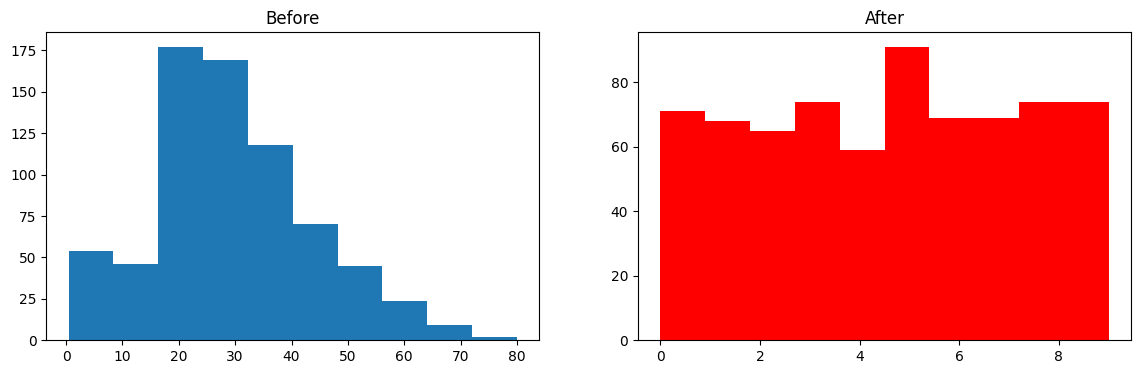

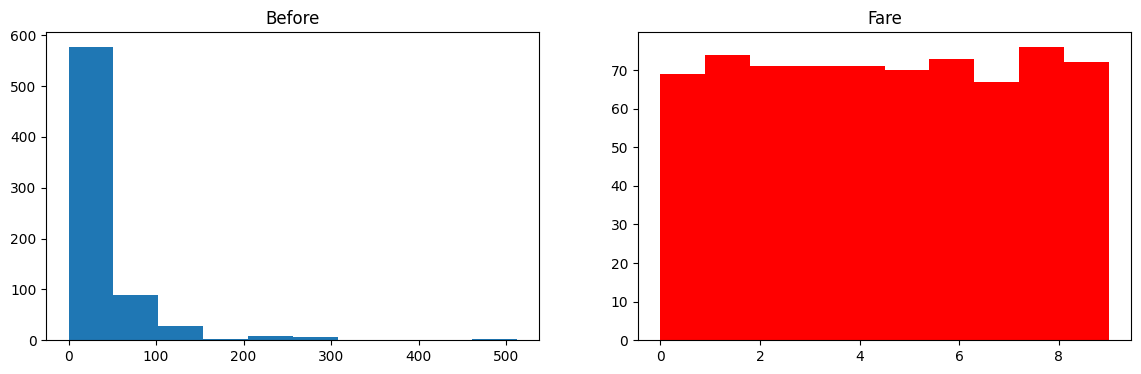

In [95]:
discretize(10,'quantile')

0.623356807511737


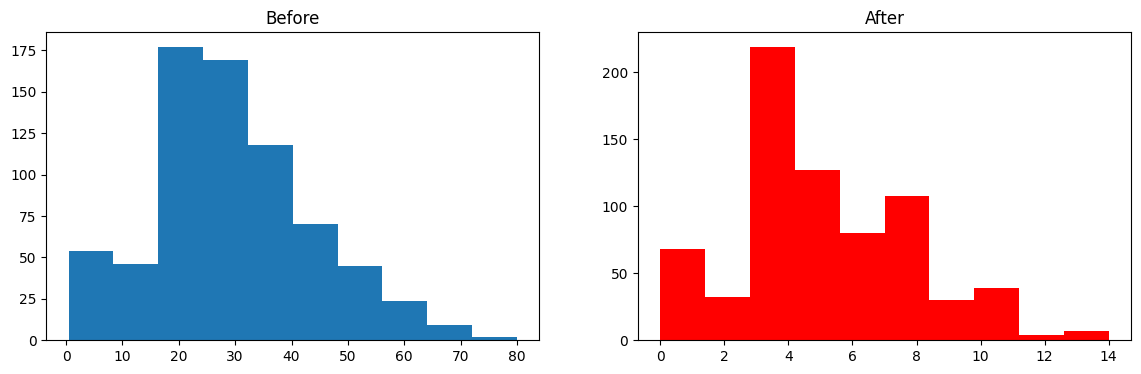

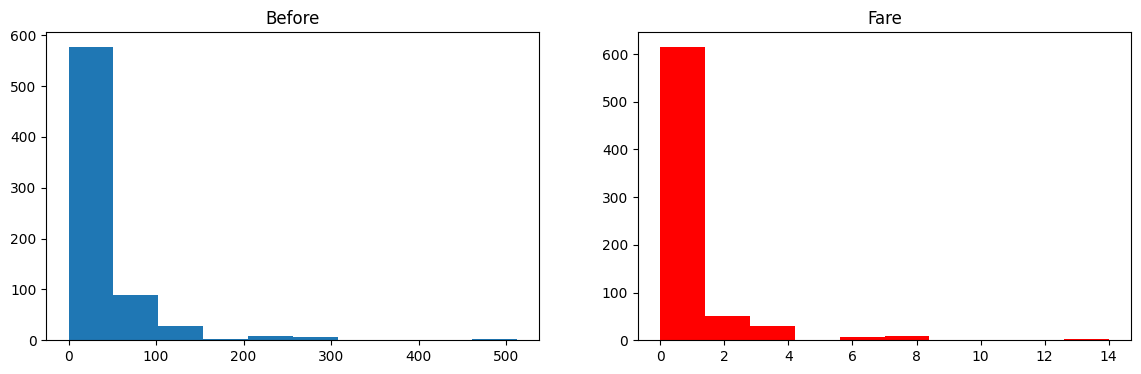

In [96]:
discretize(15,'uniform')